## Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Reading Dataset

In [2]:
train = pd.read_csv("Dataset\Train.csv")
test = pd.read_csv("Dataset\Test.csv")

## Data Visualization and Preprocessing

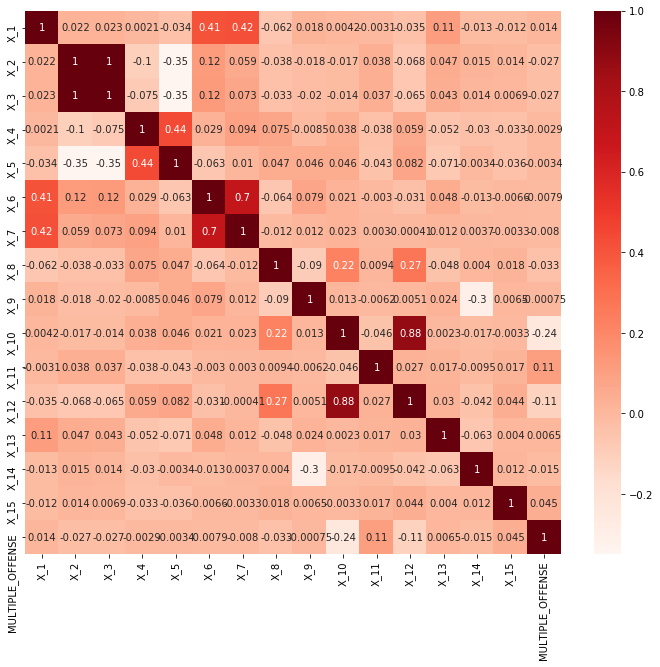

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Labels and Features

In [4]:
label = ["MULTIPLE_OFFENSE"]
features = ["X_10","X_11","X_12","X_14"]

In [5]:
featured_data = train.loc[:,features+label]
featured_data = featured_data.dropna(axis=0)
featured_data.shape

(23674, 5)

In [6]:
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

### Splitting the Dataset

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.25)

## Learning Model

In [8]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Dt = round(dt.score(X_test, y_test), 4) 
  
mae_dt = round(metrics.mean_absolute_error(y_test, y_pred), 4) 
mse_dt = round(metrics.mean_squared_error(y_test, y_pred), 4) 
print(Dt,mae_dt,mse_dt)

0.9943 0.0057 0.0057


### Data Preprocessing Test file

In [9]:
selected_test = test.loc[:,features]
#selected_test.info()
mean_values = np.mean(selected_test)
selected_test[features].replace(mean_values,np.nan,inplace=True)
for i,val in enumerate(features):
    selected_test[val] = selected_test[val].fillna(mean_values[i])
    
selected_test

,X_10,X_11,X_12,X_14
0,1,174,0.972236,119
1,1,316,0.000000,29
2,1,316,1.000000,0
3,1,174,1.000000,87
4,1,174,0.000000,93
...,...,...,...,...
15898,1,174,0.000000,29
15899,2,0,2.000000,93
15900,1,0,1.000000,62
15901,2,249,2.000000,62


## Prediction

In [10]:
#Predicting
out_pred = pd.Series(dt.predict(selected_test)).rename(label[0])
#Converting to CSV
out_df = pd.concat([test.iloc[:,0],out_pred],axis=1).to_csv("Predictions.csv",index=False)